# Airpassenger_ no differencing

In [11]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-09-13 23:27:22--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: 'airline_passengers.csv'

     0K .                                                     100% 97.7K=0.02s

2022-09-13 23:27:23 (97.7 KB/s) - 'airline_passengers.csv' saved [2036/2036]



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 데이터 전처리

In [25]:
# 로그변환
df['LogPassengers'] = np.log(df['Passengers'])

In [26]:
Ntest = 12
train = df.iloc[:-Ntest]['LogPassengers']
test = df.iloc[-Ntest:]['LogPassengers']

In [27]:
series = df['LogPassengers'].to_numpy()

# 관측 기간
T = 10

X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T] # t~t+T 까지 T 과거데이터로
    y = series[t+T] # t+T 데이터 예측
    X.append(x)
    Y.append(y)

In [28]:
X

[array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
        4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349]),
 array([4.77068462, 4.88280192, 4.8598124 , 4.79579055, 4.90527478,
        4.99721227, 4.99721227, 4.91265489, 4.77912349, 4.6443909 ]),
 array([4.88280192, 4.8598124 , 4.79579055, 4.90527478, 4.99721227,
        4.99721227, 4.91265489, 4.77912349, 4.6443909 , 4.77068462]),
 array([4.8598124 , 4.79579055, 4.90527478, 4.99721227, 4.99721227,
        4.91265489, 4.77912349, 4.6443909 , 4.77068462, 4.74493213]),
 array([4.79579055, 4.90527478, 4.99721227, 4.99721227, 4.91265489,
        4.77912349, 4.6443909 , 4.77068462, 4.74493213, 4.83628191]),
 array([4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349,
        4.6443909 , 4.77068462, 4.74493213, 4.83628191, 4.94875989]),
 array([4.99721227, 4.99721227, 4.91265489, 4.77912349, 4.6443909 ,
        4.77068462, 4.74493213, 4.83628191, 4.94875989, 4.90527478]),
 array([4.99721227, 4.91265489, 4.

In [31]:
# array로 변환
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print('X.shape', X.shape, 'Y.shape', Y.shape)

X.shape (134, 10) Y.shape (134,)


In [32]:
Xtrain, Ytrain = X[:-Ntest], Y[:-Ntest]
Xtest, Ytest = X[-Ntest:], Y[-Ntest:]

## 모델 사용

In [44]:
# 머신러닝 모델
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()

In [48]:
lr.fit(Xtrain,Ytrain)
lr.score(Xtrain,Ytrain)

0.9599443783339897

In [49]:
lr.score(Xtest, Ytest)

0.6910953044565593

In [53]:
print(train.index[0])
print(train.index[-1])

1949-01-01 00:00:00
1959-12-01 00:00:00


## 1-step예측+시각화

In [54]:
train_idx = df.index <= train.index[-1] # train 중 가장 마지막 인덱스
test_idx = ~train_idx

train_idx[:T] = False # 처음 T일 예측불가

In [58]:
# 1-step forecast
df.loc[train_idx,'LR_1step_train']= lr.predict(Xtrain)
df.loc[test_idx,'LR_1step_test'] = lr.predict(Xtest)

In [59]:
df

,Passengers,LogPassengers,LR_1step_train,LR_1step_test
Month,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,NaN,NaN
1949-03-01,132,4.882802,NaN,NaN
1949-04-01,129,4.859812,NaN,NaN
1949-05-01,121,4.795791,NaN,NaN
...,...,...,...,...
1960-08-01,606,6.406880,NaN,6.315170
1960-09-01,508,6.230481,NaN,6.305534
1960-10-01,461,6.133398,NaN,6.176992


<AxesSubplot:xlabel='Month'>

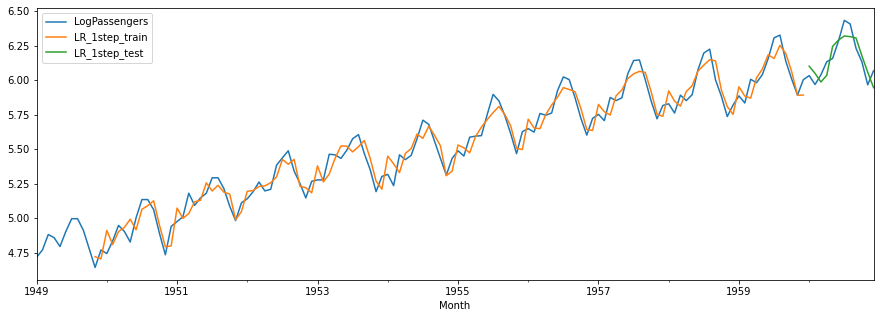

In [61]:
# plot 1-step forecast
df[['LogPassengers','LR_1step_train','LR_1step_test']].plot(figsize=(15,5))

## multi-step 예측 + 시각화

In [72]:
Xtest.shape

(12, 10)

In [73]:
# last_x
Xtest[0]

array([6.00635316, 5.98141421, 6.04025471, 6.15697899, 6.30627529,
       6.32614947, 6.13772705, 6.00881319, 5.89164421, 6.00388707])

In [74]:
lr.predict(last_x.reshape(1,-1))

array([6.19553239])

In [75]:
lr.predict(last_x.reshape(1,-1))[0]

6.19553238730171

In [65]:
multistep_predictions = []

# first test input 
# 첫번째 값 (10개값 묶음)
last_x = Xtest[0] 

# 예측값으로 대체하면서 예측을 이어나감
while len(multistep_predictions) < Ntest:
    p = lr.predict(last_x.reshape(1,-1))[0]
    
    #update the predictios list
    multistep_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x,-1)
    last_x[-1]=p

In [66]:
df.loc[test_idx, 'LR_multistep'] = multistep_predictions

<AxesSubplot:xlabel='Month'>

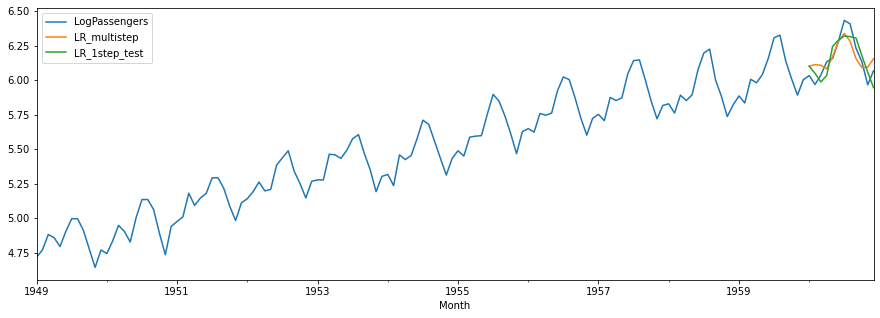

In [67]:
df[['LogPassengers','LR_multistep','LR_1step_test']].plot(figsize=(15,5))

## multi-output : Tx기간을 보고 Ty기간을 예측

In [68]:
len(series)

144

In [90]:
# T기간을 훈련시켜 Ty기간을 예측
Tx=T
Ty=Ntest
X=[]
Y=[]

for t in range(len(series)-Tx-Ty+1):
    x = series[t:t+Tx]
    y = series[t+Tx : t+Tx+Ty]
    X.append(x)
    Y.append(y)
    

In [91]:
X = np.array(X).reshape(-1,Tx)
Y = np.array(Y).reshape(-1,Ty)
N = len(X)
print('X.shape',X.shape, 'Y.shape',Y.shape)

X.shape (123, 10) Y.shape (123, 12)


In [92]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [93]:
Xtrain_m.shape

(122, 10)

In [94]:
Xtest_m.shape

(1, 10)

In [95]:
lr.fit(Xtrain_m,Ytrain_m)
lr.score(Xtrain_m,Ytrain_m)

0.9734607773512528

In [96]:
# SST is zero!
lr.score(Xtest_m, Ytest_m)

C:\Users\21ckw\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [97]:
from sklearn.metrics import r2_score

r2_score(lr.predict(Xtest_m),Ytest_m)

C:\Users\21ckw\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [98]:
# 예측값이 이중array로 되어있어 계산불가
lr.predict(Xtest_m)

array([[6.10119801, 6.09858539, 6.0909328 , 6.05847411, 6.13589143,
        6.24877608, 6.39328198, 6.39381609, 6.22452224, 6.08445182,
        5.992843  , 6.07887824]])

In [99]:
# flatten()을 통해 해결
r2_score(lr.predict(Xtest_m).flatten(),Ytest_m.flatten())

0.8018749676715199

In [100]:
df.loc[test_idx, 'LR_multioutput'] = lr.predict(Xtest_m).flatten()

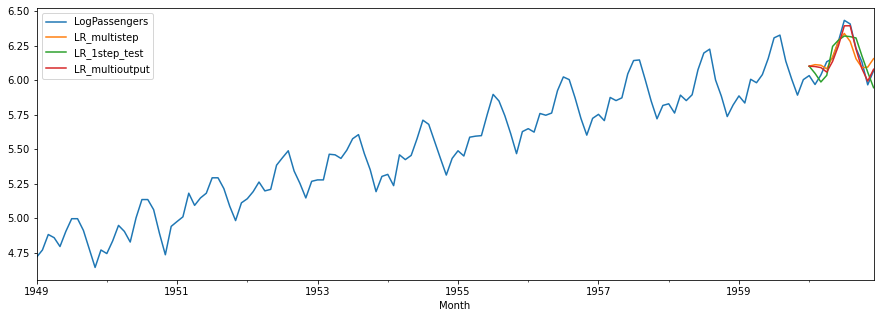

In [101]:
# 시각화
cols = ['LogPassengers', 'LR_multistep', 'LR_1step_test', 'LR_multioutput']
df[cols].plot(figsize=(15, 5));